# Install Packages

In [1]:
!pip install facexformer_pipeline

# these are neccessary for demo
!pip install visual_debugger
!pip install image_input_handler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl

# Run facexformer_pipeline on example image

In [5]:
# Import the pipeline class
from facexformer_pipeline import FacexformerPipeline

# Initialize the pipeline with desired tasks
pipeline = FacexformerPipeline(debug=True, tasks=['headpose', 'landmark', 'faceparsing'])

# Put your code for reading an image
from image_input_handler import UniversalImageInputHandler
image_path = "https://github.com/karaposu/facexformer-pipeline/blob/main/sample_image_head_only.jpg?raw=true"
uih = UniversalImageInputHandler(image_path)   #  to use UniversalImageInputHandler you need "pip install image_input_handler"
img = uih.img

# Run the model on an image
results = pipeline.run_model(img)

# Access the results from results dictionary
print("headpose: ", results['headpose'])
print("landmark list: ",results['landmarks'])
# print(results['faceparsing_mask'])


# Also you can access intermediate results such as face region crop, face coordinates etc
# print(results['face_ROI'])
print(results['face_coordinates'])
print(results['head_coordinates'])



Model weights found locally
Device set to: cpu
Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


-----------fd_coordinates: [94, 77, 188, 240]
{'pitch': -1.1, 'yaw': -1.3, 'roll': -1.9}
[(97, 186), (101, 214), (104, 239), (107, 266), (114, 292), (128, 308), (146, 318), (168, 317), (193, 314), (217, 314), (238, 315), (258, 307), (272, 290), (277, 266), (278, 237), (280, 211), (280, 181), (114, 166), (124, 148), (139, 142), (155, 141), (171, 143), (209, 142), (226, 139), (241, 139), (257, 142), (269, 161), (189, 167), (190, 184), (190, 197), (190, 212), (171, 229), (181, 230), (191, 231), (201, 229), (211, 228), (134, 177), (142, 171), (158, 171), (167, 175), (157, 175), (144, 176), (215, 172), (225, 166), (240, 168), (248, 172), (239, 175), (225, 172), (150, 257), (164, 255), (181, 254), (190, 255), (200, 253), (217, 255), (235, 255), (222, 267), (206, 270), (191, 271), (178, 269), (164, 265), (154, 259), (175, 259), (191, 259), (208, 261), (230, 257), (206, 262), (190, 261), (175, 259)]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 

# Show results in visual format

In [13]:

# Show the results on the image
from visual_debugger import VisualDebugger, Annotation, AnnotationType

vdebugger = VisualDebugger(tag="facex", debug_folder_path="./", active=True)

annotation_landmarks_face_ROI = [Annotation(type=AnnotationType.POINTS, coordinates=results["landmarks_face_ROI"])]
annotation_landmarks = [Annotation(type=AnnotationType.POINTS, coordinates=results["landmarks"])]
annotation_headpose = [Annotation(type=AnnotationType.PITCH_YAW_ROLL, orientation=[results["headpose"]["pitch"],results["headpose"]["yaw"],results["headpose"]["roll"] ])]
annotation_face_coordinates = [Annotation(type=AnnotationType.RECTANGLE, coordinates=results["face_coordinates"])]
annotation_head_coordinates = [Annotation(type=AnnotationType.RECTANGLE, coordinates=results["head_coordinates"])]
annotation_faceparsing = [Annotation(type=AnnotationType.MASK, mask=results["faceparsing_mask"])]
annotation_faceparsing_head_ROI = [Annotation(type=AnnotationType.MASK, mask=results["faceparsing_mask_head_ROI"])]

vdebugger.visual_debug(img, name="original_image")
vdebugger.visual_debug(img, annotation_face_coordinates, name="", stage_name="face_coor")
vdebugger.visual_debug(results["face_ROI"], name="", stage_name="cropped_face_ROI")
vdebugger.visual_debug(img, annotation_head_coordinates, name="", stage_name="head_coor")
vdebugger.visual_debug(results["head_ROI"], name="", stage_name="cropped_head_ROI")
vdebugger.visual_debug(results["face_ROI"], annotation_landmarks_face_ROI, name="landmarks", stage_name="on_face_ROI")
vdebugger.visual_debug(img, annotation_landmarks, name="landmarks", stage_name="on_image")
vdebugger.visual_debug(results["face_ROI"], annotation_headpose, name="headpose")
vdebugger.visual_debug(results["head_ROI"], annotation_faceparsing_head_ROI, name="faceparsing", stage_name="mask_on_head_ROI")
vdebugger.visual_debug(img, annotation_faceparsing, name="faceparsing", stage_name="mask_on_full_image")
vdebugger.cook_merged_img() # creates merged image

Group 'original_image' - Height: 414, Width: 446
Group '' - Height: 1527, Width: 446
Group 'landmarks' - Height: 704, Width: 446
Group 'headpose' - Height: 290, Width: 248
Group 'faceparsing' - Height: 823, Width: 446
Saving final image to /content/0_merged.png


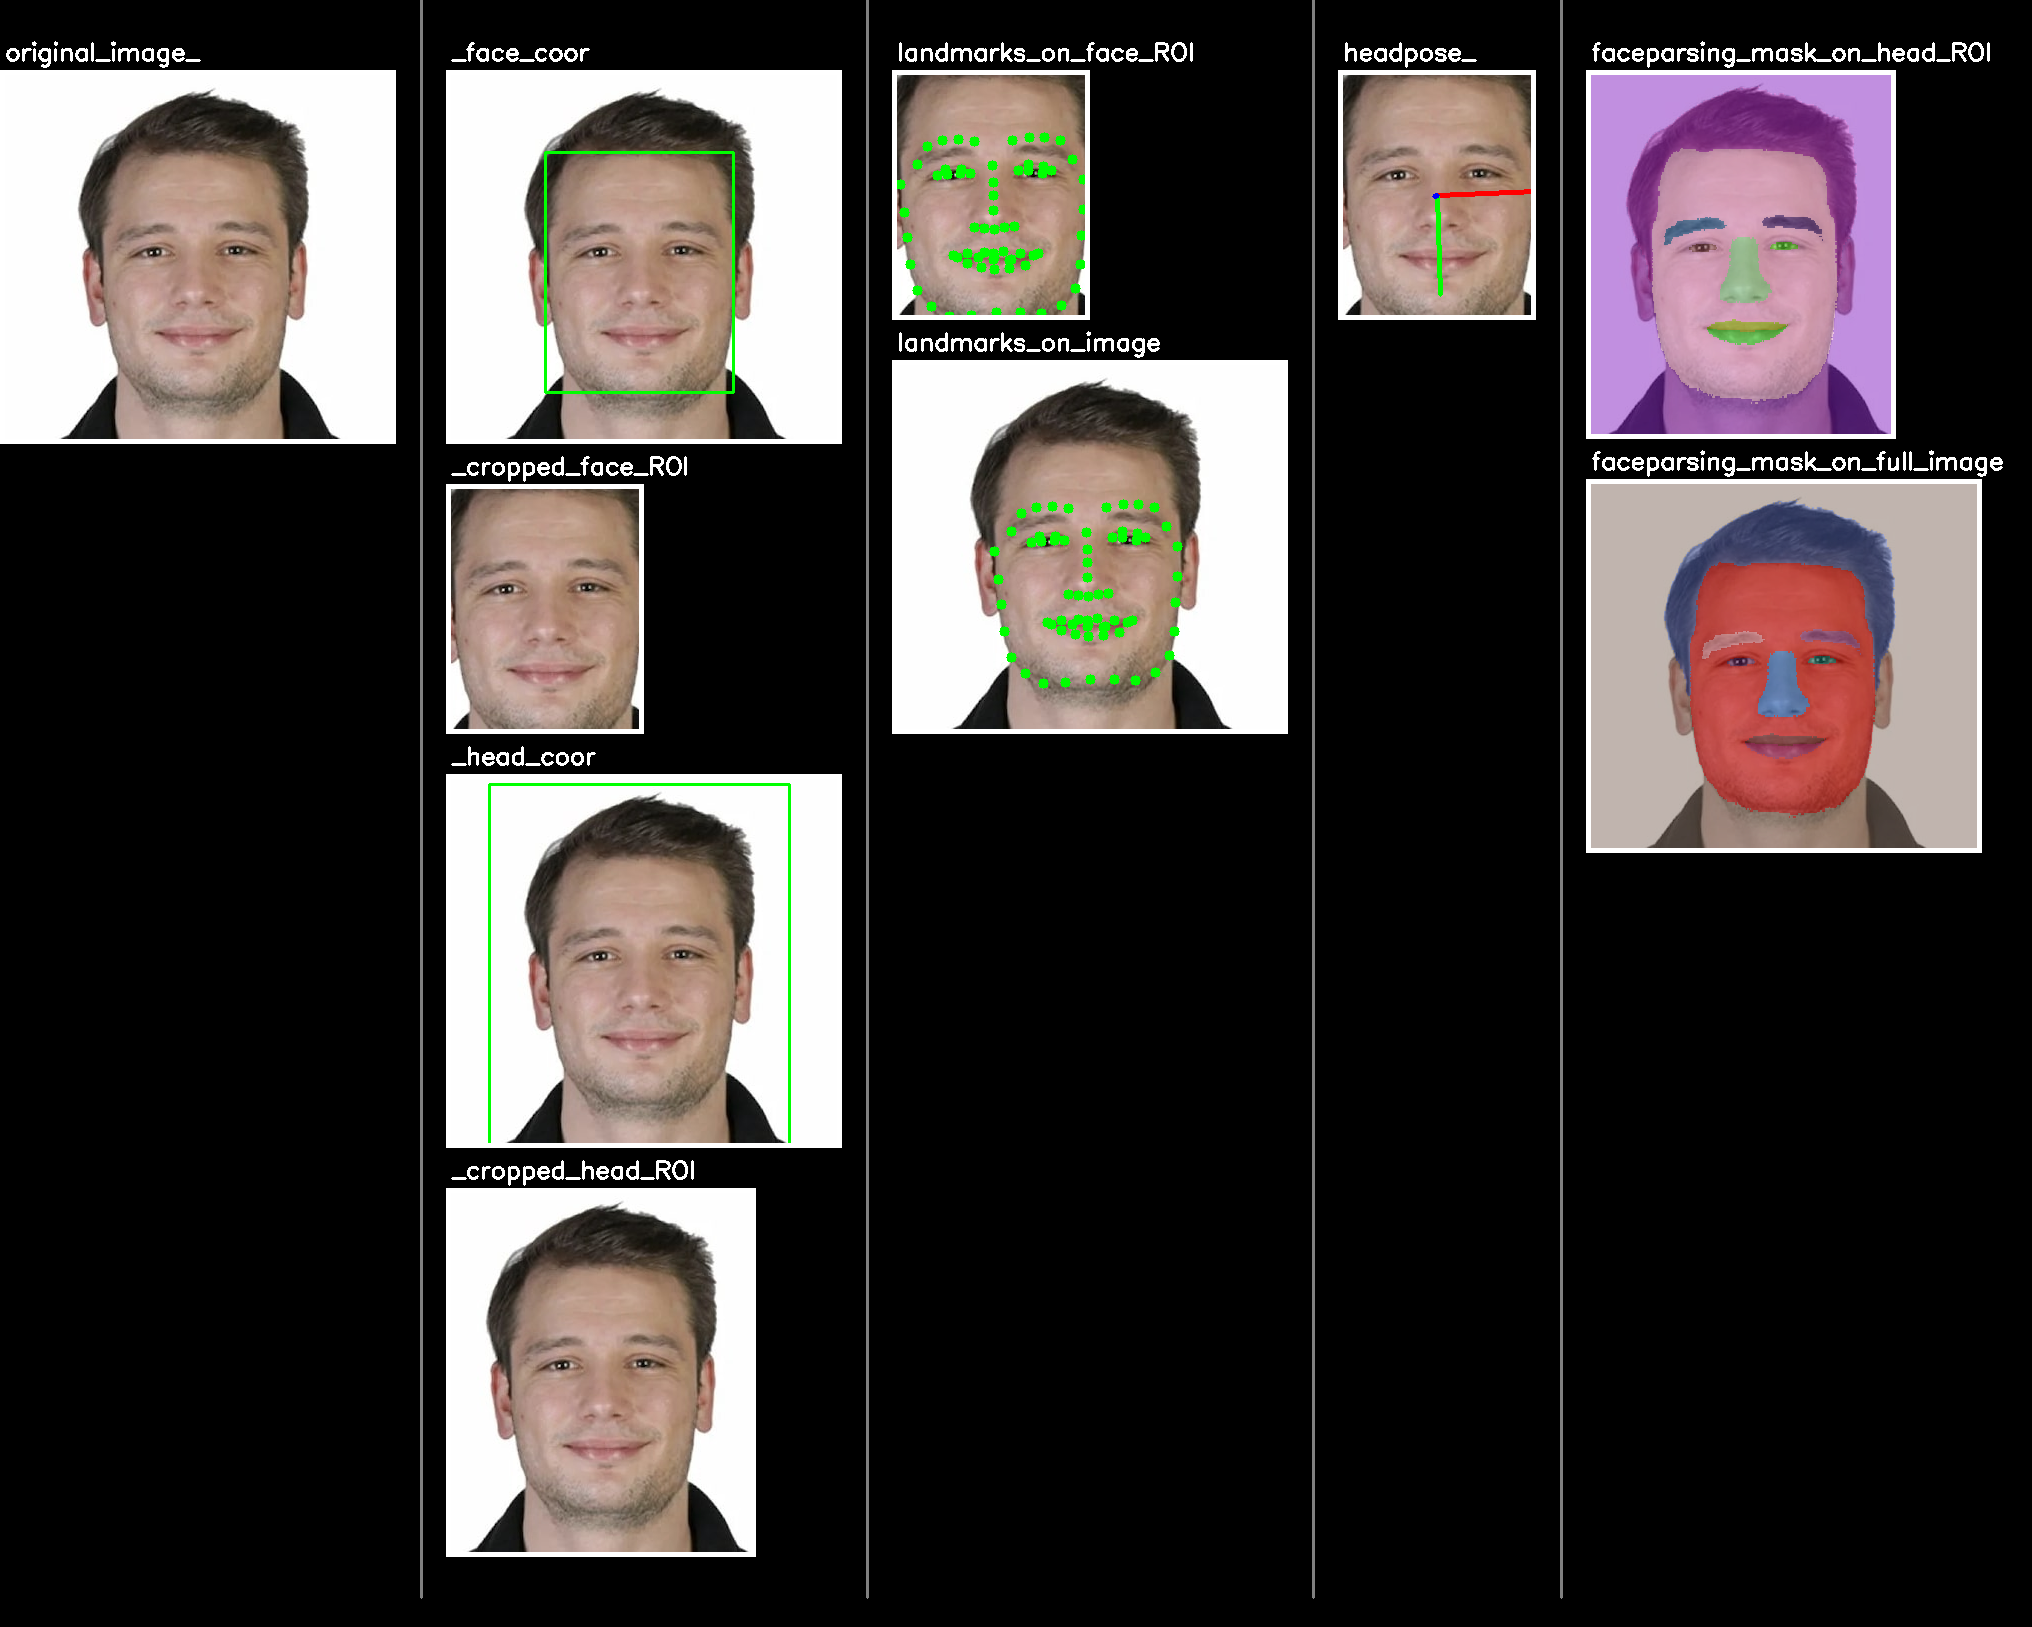

In [14]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/0_merged.png'
image = cv2.imread(image_path)

# Display the image using cv2_imshow
cv2_imshow(image)